<a href="https://colab.research.google.com/github/Harshit28012002/MRM-Harshit-JIo-insititute/blob/main/Reddit%20Mercedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import praw

# Read-only access setup
reddit = praw.Reddit(
    client_id="0AmnPigLZ6SXtWFhmbPEmA",
    client_secret="Yj4wWZcOyO4nZ21l37py88RoxZ8uMw",
    user_agent="Mercedes Sentiment Analysis by u/Right_Week7178"
)

# Test the connection
print("Read-only mode:", reddit.read_only)  # Should print True


ModuleNotFoundError: No module named 'praw'

In [ ]:
!pip install praw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.1 MB/s eta 0:00:00


In [ ]:
import praw

# Read-only access setup
reddit = praw.Reddit(
    client_id="0AmnPigLZ6SXtWFhmbPEmA",
    client_secret="Yj4wWZcOyO4nZ21l37py88RoxZ8uMw",
    user_agent="Mercedes Sentiment Analysis by u/Right_Week7178"
)

# Test the connection
print("Read-only mode:", reddit.read_only)  # Should print True

Read-only mode: True


In [ ]:
# Fetch posts from all subreddits containing the keyword "Mercedes"
search_query = "Mercedes"
subreddit = reddit.subreddit("all")  # Replace with a specific subreddit if needed (e.g., 'cars')

posts = []
for post in subreddit.search(search_query, limit=100):
    posts.append({
        "title": post.title,
        "score": post.score,
        "comments": post.num_comments,
        "body": post.selftext
    })

# Check the fetched posts
print(f"Fetched {len(posts)} posts related to '{search_query}'.")


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetched 100 posts related to 'Mercedes'.


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="praw")


In [ ]:
for i, post in enumerate(posts[:5]):  # Display the first 5 posts
    print(f"Post {i + 1}: {post['title']}")
    print(f"Score: {post['score']}")
    print(f"Comments: {post['comments']}")
    print(f"Body: {post['body'][:200]}...")  # Show the first 200 characters of the body
    print("-" * 50)


Post 1: Em and Mercedes post show 
Score: 74
Comments: 58
Body: Lol at least they know that they won because people were voting for em and Mercedes just happened to be there too. ...
--------------------------------------------------
Post 2: Mercedes 👎
Score: 85
Comments: 80
Body: Dude is from multiple seasons of FBoy Island but now wears contacts. The way he just accepts the compliment from Sophie about his eyes and no mentions of his super messy ways in the US are giving stil...
--------------------------------------------------
Post 3: Em <3 and Mercedes 
Score: 172
Comments: 125
Body: Mercedes just blocked Em, also repost didn’t mean to spoil anything guys sorry!! ...
--------------------------------------------------
Post 4: Mercedes roa
Score: 74
Comments: 2
Body: ...
--------------------------------------------------
Post 5: Em and Mercedes relationship status 
Score: 173
Comments: 236
Body: This is sad to hear. Still happy she got money though. ...
-----------------------------

In [ ]:
from textblob import TextBlob

# Add sentiment analysis to each post
for post in posts:
    title_sentiment = TextBlob(post["title"]).sentiment.polarity
    body_sentiment = TextBlob(post["body"]).sentiment.polarity
    post["title_sentiment"] = title_sentiment
    post["body_sentiment"] = body_sentiment
    post["overall_sentiment"] = (title_sentiment + body_sentiment) / 2  # Combine title and body sentiment


In [ ]:
for post in posts:
    if post["overall_sentiment"] > 0:
        post["sentiment_label"] = "positive"
    elif post["overall_sentiment"] < 0:
        post["sentiment_label"] = "negative"
    else:
        post["sentiment_label"] = "neutral"


In [ ]:
import pandas as pd

df = pd.DataFrame(posts)
print(df.head())  # Display the first few rows


                                  title  score  comments  \
0            Em and Mercedes post show      74        58   
1                            Mercedes 👎     85        80   
2                   Em <3 and Mercedes     172       125   
3                          Mercedes roa     74         2   
4  Em and Mercedes relationship status     173       236   

                                                body  title_sentiment  \
0  Lol at least they know that they won because p...              0.0   
1  Dude is from multiple seasons of FBoy Island b...              0.0   
2  Mercedes just blocked Em, also repost didn’t m...              1.0   
3                                                                 0.0   
4  This is sad to hear. Still happy she got money...              0.0   

   body_sentiment  overall_sentiment sentiment_label  
0        0.250000           0.125000        positive  
1        0.044444           0.022222        positive  
2       -0.546875           0.22656

<ipython-input-10-3c486165c284>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment_label", palette="viridis")


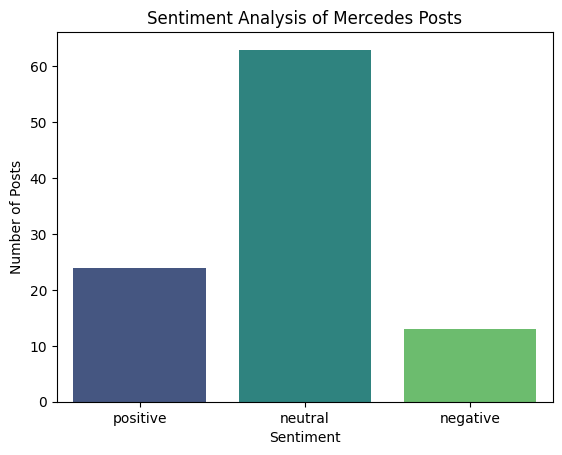

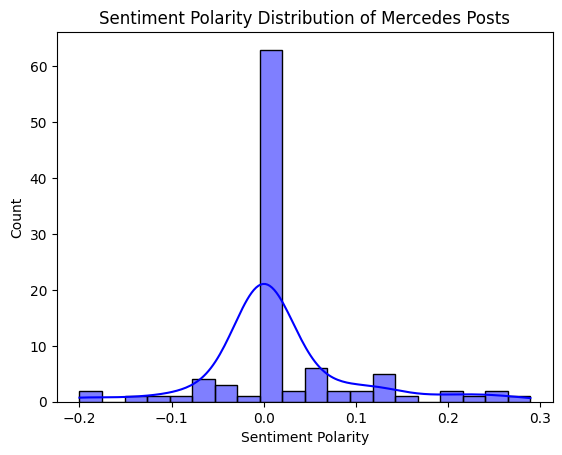

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sentiment distribution
sns.countplot(data=df, x="sentiment_label", palette="viridis")
plt.title("Sentiment Analysis of Mercedes Posts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.show()

# Sentiment polarity distribution
sns.histplot(df["overall_sentiment"], bins=20, kde=True, color="blue")
plt.title("Sentiment Polarity Distribution of Mercedes Posts")
plt.xlabel("Sentiment Polarity")
plt.show()
